# **Atividade 4**

*   Cristiano Moreira Martins
*   Data: 01/04/2024


In [1]:
!pip install pyspellchecker
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 10.3 MB/s eta 0:00:00


In [6]:

import os
import pandas as pd
import spacy
import spacy.cli
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator
from spellchecker import SpellChecker
from matplotlib import colormaps

Carregando o modelo de linguagem do spacy para viabilizar análises

In [3]:
spacy.cli.download("pt_core_news_lg")
nlp = spacy.load('pt_core_news_lg')

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


####1. Carregar o dataset fornecido.

In [40]:
def read_files(path):
  texts = pd.DataFrame()
  for filename in os.listdir(path):
    with open(path + filename, encoding='utf-16') as file:
      lines = file.readlines()

      tmp_data = pd.DataFrame()
      tmp_data['line'] = lines
      tmp_data['filename'] = filename
      texts = pd.concat([texts, tmp_data])

  texts.reset_index(inplace=True)

  return texts


In [41]:
root_path = './esporte/'
texts = read_files(root_path)

In [42]:
texts

,index,line,filename
0,0,"O ala-pivô Nenê, 22, maior astro do basquete n...",ESPORTE_2005_22023.txt
1,1,"""As condições atuais para defender o Brasil sã...",ESPORTE_2005_22023.txt
2,2,"Nenê havia dito, antes da eleição na confedera...",ESPORTE_2005_22023.txt
3,3,"Com a reeleição de Gerasime Bozikis, o Grego, ...",ESPORTE_2005_22023.txt
4,4,"""Quando falo para meus companheiros no exterio...",ESPORTE_2005_22023.txt
...,...,...,...
70,2,Já a Ferrari agradeceu à dedicação do brasilei...,ESPORTE_2005_21834.txt
71,3,"""Quero agradecer ao Rubens pela colaboração no...",ESPORTE_2005_21834.txt
72,4,"A exemplo de Felipe Massa, Barrichello chegou ...",ESPORTE_2005_21834.txt
73,5,"Uma exceção, porém, foi aberta para que Massa ...",ESPORTE_2005_21834.txt


####2. Contar e exibir a quantidade de sentenças em cada texto e no dataset inteiro.

In [66]:
for idx, r in texts.iterrows():
  #print(idx, r['line'])
  doc = nlp(r['line'])
  texts.at[idx, 'sentences'] = int(len(list(doc.sents)))

In [67]:
s_count = texts['sentences'].sum()
print(f'Sentenças no dataset: {s_count}')
texts

Sentenças no dataset: 184.0


,index,line,filename,sentences
0,0,"O ala-pivô Nenê, 22, maior astro do basquete n...",ESPORTE_2005_22023.txt,1.0
1,1,"""As condições atuais para defender o Brasil sã...",ESPORTE_2005_22023.txt,2.0
2,2,"Nenê havia dito, antes da eleição na confedera...",ESPORTE_2005_22023.txt,2.0
3,3,"Com a reeleição de Gerasime Bozikis, o Grego, ...",ESPORTE_2005_22023.txt,2.0
4,4,"""Quando falo para meus companheiros no exterio...",ESPORTE_2005_22023.txt,2.0
...,...,...,...,...
70,2,Já a Ferrari agradeceu à dedicação do brasilei...,ESPORTE_2005_21834.txt,4.0
71,3,"""Quero agradecer ao Rubens pela colaboração no...",ESPORTE_2005_21834.txt,2.0
72,4,"A exemplo de Felipe Massa, Barrichello chegou ...",ESPORTE_2005_21834.txt,2.0
73,5,"Uma exceção, porém, foi aberta para que Massa ...",ESPORTE_2005_21834.txt,2.0


####3. Exibir a quantidade média de sentenças por texto (basta dividir por 10 a quantidade total de sentenças do dataset).


In [68]:
print(f'Quantidade média de sentenças por texto: {s_count/10}')

Quantidade média de sentenças por texto: 18.4


####4. Contar e exibir a quantidade de tokens brutos (sem normalização e sem limpeza) por texto e no dataset inteiro. Não incluir pontuação. Os tokens devem ser palavras.

In [69]:
def count_tokens(text):
  tokens={}
  doc = nlp(text)
  for token in doc:
    if token in tokens:
      tokens[token] += 1
    else:
      tokens[token] = 1

  return len(tokens)


In [70]:
for idx, r in texts.iterrows():
  texts.at[idx, 'raw_tokens'] = count_tokens(r['line'])

In [72]:
rt_count = texts['raw_tokens'].sum()
print(f'Quantidade de tokens brutos no dataset: {rt_count}')
texts

Quantidade de tokens brutos no dataset: 3120.0


,index,line,filename,sentences,raw_tokens
0,0,"O ala-pivô Nenê, 22, maior astro do basquete n...",ESPORTE_2005_22023.txt,1.0,33.0
1,1,"""As condições atuais para defender o Brasil sã...",ESPORTE_2005_22023.txt,2.0,30.0
2,2,"Nenê havia dito, antes da eleição na confedera...",ESPORTE_2005_22023.txt,2.0,27.0
3,3,"Com a reeleição de Gerasime Bozikis, o Grego, ...",ESPORTE_2005_22023.txt,2.0,44.0
4,4,"""Quando falo para meus companheiros no exterio...",ESPORTE_2005_22023.txt,2.0,43.0
...,...,...,...,...,...
70,2,Já a Ferrari agradeceu à dedicação do brasilei...,ESPORTE_2005_21834.txt,4.0,70.0
71,3,"""Quero agradecer ao Rubens pela colaboração no...",ESPORTE_2005_21834.txt,2.0,29.0
72,4,"A exemplo de Felipe Massa, Barrichello chegou ...",ESPORTE_2005_21834.txt,2.0,29.0
73,5,"Uma exceção, porém, foi aberta para que Massa ...",ESPORTE_2005_21834.txt,2.0,34.0


####5. Exibir a quantidade média de tokens brutos por texto (basta dividir por 10 a quantidade total de tokens brutos do dataset).

In [73]:
print(f'Quantidade média de sentenças por texto: {rt_count/10}')

Quantidade média de sentenças por texto: 312.0


####6. Aplicar normalização léxica nos tokens. Usar lematização.

####7. Contar e exibir a quantidade de types, ou seja, tokens distintos. Para isso, crie um dicionário com os termos normalizados e sua frequência absoluta no dataset.

####8. Remover as stopwords. Inclua tokens na stoplist se julgar necessário. Exibir a quantidade de tokens removida.

####9. Criar uma nuvem de palavras com os 30 tokens normalizados mais frequentes.

####10. Poste no link abaixo o seu programa contendo as operações pedidas acima. Não esqueça de identificar a dupla, ou seja, incluir os seus nomes no cabeçalho do seu programa python.

Geração da nuvem de palavra

In [4]:
#Lista de palavras
lista = {}
lista['gente'] = 128
lista['achar'] = 67
lista['projeto'] = 38
lista['tribunal'] = 34
lista['trabalhar'] = 31
lista['fazer'] = 28
lista['falar'] = 27
lista['modelo'] = 20
lista['judiciario'] = 15
lista['processo'] = 12

print("Nuvens de palavras geradas: ")
print('Quantidade de palavras relevantes :' ,len(lista))

for item in lista:
  print(item)


Nuvens de palavras geradas: 
Quantidade de palavras relevantes : 10
gente
achar
projeto
tribunal
trabalhar
fazer
falar
modelo
judiciario
processo


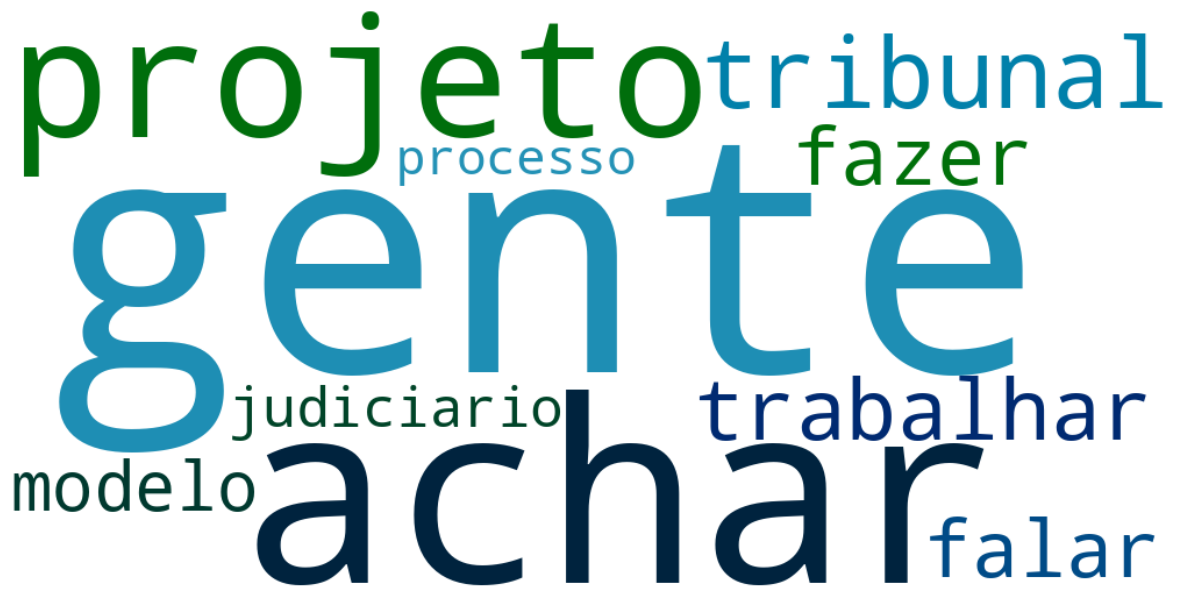

In [5]:
#Nuvem de palavras
#https://matplotlib.org/stable/users/explain/colors/colormaps.html
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 500, contour_width = 2,mode="RGBA",colormap="ocean",contour_color = 'darkblack',max_words=600) #nuvem 1
wordcloud.generate_from_frequencies(frequencies = lista)

plt.figure(figsize = (15, 10)) # tamanho do gráfico
plt.imshow(wordcloud, interpolation = 'bilinear') # plotagem da nuvem de palavras
plt.axis('off') # remove as bordas
plt.savefig('nuvemPalavras_1.png', format='png')
plt.show() # mostra a word cloud